 Наука о данных и методы искусственного интеллекта

# Исследовательский проект


Литература:


1.   https://github.com/kushnas/Emotions_classification
2.   https://habr.com/ru/companies/otus/articles/918832/
3.   https://www.machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/
4.   https://www.kaggle.com/datasets/krishd123/gsr-collection-for-mental-strain/code
5.   http://neerc.ifmo.ru/wiki/index.php
6.   https://neurohive.io/ru/novosti/emopy-emotion-recognition/
7.   https://chernobrovov.ru/articles/top-7-python-bibliotek-dlya-vremennyh-ryadov.html
8.  https://habr.com/ru/articles/860794/


In [ ]:
!pip install tpot scikit-learn pandas numpy matplotlib seaborn -q
!pip install jedi dill==0.3.8
!pip install --upgrade datasets
!pip install dill==0.3.9

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.1/215.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [2]:
import os
import zipfile

# Путь к загруженному архиву
archive_path = '/content/archive.zip'
extract_path = '/content/stress_data'

# Проверяем, существует ли архив
if not os.path.exists(archive_path):
    print(f"❌ Архив не найден: {archive_path}")
    print("\nЗАГРУЗИТЕ АРХИВ ВРУЧНУЮ:")
    print("1. Слева нажмите 📁 'Файлы'")
    print("2. Нажмите ↑ 'Загрузить'")
    print("3. Выберите ваш архив stress_dataset.zip")
    raise FileNotFoundError("Загрузите архив вручную")
else:
    # Распаковываем архив
    print(f"✅ Архив найден: {archive_path}")

    # Очищаем старые данные (если были)
    if os.path.exists(extract_path):
        !rm -rf {extract_path}

    # Создаем новую папку
    os.makedirs(extract_path, exist_ok=True)

    # Распаковываем
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print(f"✅ Распаковка завершена в: {extract_path}")

    # Показываем структуру
    print("\n📁 СТРУКТУРА ДАТАСЕТА:")
    for root, dirs, files in os.walk(extract_path):
        level = root.replace(extract_path, '').count(os.sep)
        indent = ' ' * 2 * level

        # Показываем папки
        if os.path.basename(root):
            print(f"{indent}📂 {os.path.basename(root)}/")

        # Показываем первые 5 файлов в каждой папке
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:
            if file.endswith('.csv'):
                print(f"{subindent}📄 {file}")

        if len(files) > 5:
            print(f"{subindent}... и ещё {len(files)-5} файлов")


❌ Архив не найден: /content/archive.zip

ЗАГРУЗИТЕ АРХИВ ВРУЧНУЮ:
1. Слева нажмите 📁 'Файлы'
2. Нажмите ↑ 'Загрузить'
3. Выберите ваш архив stress_dataset.zip


FileNotFoundError: Загрузите архив вручную

In [ ]:
import pandas as pd
import numpy as np

# Путь к распакованным данным
base_path = '/content/stress_data'

# Проверяем структуру датасета
print("🔍 АНАЛИЗИРУЮ СТРУКТУРУ ДАТАСЕТА...")

# Ищем папки High_MWL и Low_MWL
high_mwl_path = os.path.join(base_path, 'High_MWL', 'High_MWL')
low_mwl_path = os.path.join(base_path, 'Low_MWL', 'Low_MWL')

paths_found = []
if os.path.exists(high_mwl_path):
    high_files = [f for f in os.listdir(high_mwl_path) if f.endswith('.csv')]
    paths_found.append(('High_MWL (стресс)', high_mwl_path, len(high_files)))

if os.path.exists(low_mwl_path):
    low_files = [f for f in os.listdir(low_mwl_path) if f.endswith('.csv')]
    paths_found.append(('Low_MWL (нет стресса)', low_mwl_path, len(low_files)))

if not paths_found:
    print("❌ Не найдены папки High_MWL или Low_MWL")
    print("Содержимое корневой папки:")
    for item in os.listdir(base_path):
        print(f"  - {item}")
    raise FileNotFoundError("Некорректная структура датасета")

# Показываем найденное
print("\n📊 НАЙДЕННЫЕ ДАННЫЕ:")
for name, path, count in paths_found:
    print(f"  {name}: {count} CSV файлов в {path}")

# ФУНКЦИЯ ДЛЯ ЗАГРУЗКИ ВСЕХ ДАННЫХ

def load_all_data(high_path, low_path):
    """
    Загружает все CSV файлы и создает единый DataFrame
    """
    all_dataframes = []

    # 1. Загружаем данные ВЫСОКОЙ нагрузки (СТРЕСС = 1)
    if os.path.exists(high_path):
        print(f"\n📥 Загружаю HIGH MWL (стресс)...")
        for file in os.listdir(high_path):
            if file.endswith('.csv'):
                file_path = os.path.join(high_path, file)
                try:
                    df = pd.read_csv(file_path)
                    # Извлекаем ID испытуемого из имени файла (например, p8h -> 8)
                    subject_id = file.replace('.csv', '').replace('p', '').replace('h', '')
                    df['subject_id'] = int(subject_id)
                    df['subject_file'] = file  # Сохраняем оригинальное имя
                    df['stress'] = 1  # Метка: стресс
                    all_dataframes.append(df)
                    print(f"    ✅ {file}: {len(df)} строк, {len(df.columns)} колонок")
                except Exception as e:
                    print(f"    ❌ {file}: Ошибка - {e}")

    # 2. Загружаем данные НИЗКОЙ нагрузки (НЕТ СТРЕССА = 0)
    if os.path.exists(low_path):
        print(f"\n📥 Загружаю LOW MWL (нет стресса)...")
        for file in os.listdir(low_path):
            if file.endswith('.csv'):
                file_path = os.path.join(low_path, file)
                try:
                    df = pd.read_csv(file_path)
                    # Извлекаем ID испытуемого из имени файла (например, p3l -> 3)
                    subject_id = file.replace('.csv', '').replace('p', '').replace('l', '')
                    df['subject_id'] = int(subject_id)
                    df['subject_file'] = file  # Сохраняем оригинальное имя
                    df['stress'] = 0  # Метка: нет стресса
                    all_dataframes.append(df)
                    print(f"    ✅ {file}: {len(df)} строк, {len(df.columns)} колонок")
                except Exception as e:
                    print(f"    ❌ {file}: Ошибка - {e}")

    # Объединяем все данные
    if all_dataframes:
        full_df = pd.concat(all_dataframes, ignore_index=True)
        return full_df
    else:
        return None

# Загружаем данные
full_df = load_all_data(high_mwl_path, low_mwl_path)

if full_df is not None:
    print(f"\n✅ ВСЕ ДАННЫЕ ЗАГРУЖЕНЫ!")
    print(f"   Всего записей: {len(full_df):,}")
    print(f"   Уникальных испытуемых: {full_df['subject_id'].nunique()}")
    print(f"   Колонок: {len(full_df.columns)}")

    # Показываем информацию о данных
    print(f"\n📋 ИНФОРМАЦИЯ О ДАННЫХ:")
    print(full_df.info())

    # Показываем статистику
    print(f"\n📊 СТАТИСТИКА КЛАССОВ:")
    stress_stats = full_df['stress'].value_counts()
    for stress_level, count in stress_stats.items():
        label = "СТРЕСС (High MWL)" if stress_level == 1 else "НЕТ СТРЕССА (Low MWL)"
        percentage = count / len(full_df) * 100
        print(f"   {label}: {count:,} записей ({percentage:.1f}%)")

    # Показываем распределение по испытуемым
    print(f"\n👥 РАСПРЕДЕЛЕНИЕ ПО ИСПЫТУЕМЫМ:")
    subjects_summary = full_df.groupby(['subject_id', 'stress']).size().unstack(fill_value=0)
    print(subjects_summary.head(10))  # Первые 10 испытуемых

    # Показываем пример данных
    print(f"\n👁️  ПРИМЕР ДАННЫХ (первые 3 строки):")
    # Выбираем только несколько колонок для наглядности
    if len(full_df.columns) > 10:
        sample_cols = ['subject_id', 'stress'] + [col for col in full_df.columns if col not in ['subject_id', 'subject_file', 'stress']][:3]
    else:
        sample_cols = full_df.columns[:5]
    print(full_df[sample_cols].head(3))

else:
    print("❌ Не удалось загрузить данные")

🔍 АНАЛИЗИРУЮ СТРУКТУРУ ДАТАСЕТА...

📊 НАЙДЕННЫЕ ДАННЫЕ:
  High_MWL (стресс): 22 CSV файлов в /content/stress_data/High_MWL/High_MWL
  Low_MWL (нет стресса): 22 CSV файлов в /content/stress_data/Low_MWL/Low_MWL

📥 Загружаю HIGH MWL (стресс)...
    ✅ p8h.csv: 76800 строк, 5 колонок
    ✅ p2h.csv: 76800 строк, 5 колонок
    ✅ p23h.csv: 76800 строк, 5 колонок
    ✅ p18h.csv: 76800 строк, 5 колонок
    ✅ p24h.csv: 76800 строк, 5 колонок
    ✅ p21h.csv: 76800 строк, 5 колонок
    ✅ p17h.csv: 76800 строк, 5 колонок
    ✅ p12h.csv: 76800 строк, 5 колонок
    ✅ p10h.csv: 76800 строк, 5 колонок
    ✅ p5h.csv: 76800 строк, 5 колонок
    ✅ p15h.csv: 76800 строк, 5 колонок
    ✅ p4h.csv: 76800 строк, 5 колонок
    ✅ p22h.csv: 76800 строк, 5 колонок
    ✅ p3h.csv: 76800 строк, 5 колонок
    ✅ p16h.csv: 76800 строк, 5 колонок
    ✅ p11h.csv: 76800 строк, 5 колонок
    ✅ p25h.csv: 76800 строк, 5 колонок
    ✅ p19h.csv: 76800 строк, 5 колонок
    ✅ p14h.csv: 76800 строк, 5 колонок
    ✅ p13h.csv: 76800

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.impute import SimpleImputer
import joblib

if 'full_df' not in locals():
    print("❌ Данные не загружены. Сначала запустите БЛОК 2.")
else:
    print("🔍 ПРОВЕРКА НА NaN ЗНАЧЕНИЯ...")

    # Проверяем каждый признак
    nan_stats = {}
    for col in ['Trial 1:0back', 'Trial 3:3back', 'Trial 5:3back', 'Trial 6:0back']:
        nan_count = full_df[col].isna().sum()
        nan_percent = nan_count / len(full_df) * 100
        nan_stats[col] = (nan_count, nan_percent)
        print(f"   {col}: {nan_count:,} NaN ({nan_percent:.2f}%)")

    # Если ВСЕ значения NaN - это критическая ошибка
    if all(nan_stats[col][0] == len(full_df) for col in nan_stats):
        print("\n❌ КРИТИЧЕСКАЯ ОШИБКА: Все значения NaN!")
        print("   Вероятные причины:")
        print("   1. Неправильная загрузка CSV (проблема с разделителем)")
        print("   2. Поврежденные файлы")
        print("   3. Неверная кодировка")

        # Проверим первые несколько строк сырых данных
        print("\n🔍 ПРОВЕРКА СЫРЫХ ДАННЫХ (первые 3 строки):")
        print(full_df.head(3))

        # Проверим типы данных
        print("\n📊 ТИПЫ ДАННЫХ:")
        print(full_df.dtypes)

        raise ValueError("Все признаки содержат только NaN значения!")

    print("\n🔧 ОБРАБОТКА NaN ЗНАЧЕНИЙ...")

    # 1. Вариант A: Удалить строки с NaN (если их мало)
    total_nan = sum(nan_stats[col][0] for col in nan_stats)
    nan_percentage = total_nan / (len(full_df) * 4) * 100

    if nan_percentage < 5:  # Если NaN меньше 5%
        print(f"   Удаляю строки с NaN ({nan_percentage:.1f}% данных)...")
        df_clean = full_df.dropna(subset=['Trial 1:0back', 'Trial 3:3back', 'Trial 5:3back', 'Trial 6:0back'])
        print(f"   После очистки: {len(df_clean):,} строк (было {len(full_df):,})")
    else:
        # 2. Вариант B: Заполнить NaN (если их много)
        print(f"   Заполняю NaN значения ({nan_percentage:.1f}% данных)...")

        # Создаем копию данных
        df_clean = full_df.copy()

        # Заполняем NaN медианным значением по каждому испытуемому
        for col in ['Trial 1:0back', 'Trial 3:3back', 'Trial 5:3back', 'Trial 6:0back']:
            # Заполняем медианой по группам subject_id
            df_clean[col] = df_clean.groupby('subject_id')[col].transform(
                lambda x: x.fillna(x.median())
            )
            # Если остались NaN (вся группа была NaN), заполняем общей медианой
            if df_clean[col].isna().any():
                df_clean[col].fillna(df_clean[col].median(), inplace=True)

        print(f"   После заполнения: 0 NaN значений")

    # Проверяем, что NaN удалены
    print("\n✅ ПРОВЕРКА ОЧИСТКИ ДАННЫХ:")
    for col in ['Trial 1:0back', 'Trial 3:3back', 'Trial 5:3back', 'Trial 6:0back']:
        remaining_nan = df_clean[col].isna().sum()
        print(f"   {col}: {remaining_nan} NaN осталось")

    # 3. Выделяем признаки
    print("\n🔧 ПОДГОТОВКА ПРИЗНАКОВ...")
    feature_cols = ['Trial 1:0back', 'Trial 3:3back', 'Trial 5:3back', 'Trial 6:0back']

    X = df_clean[feature_cols].values
    y = df_clean['stress'].values
    groups = df_clean['subject_id'].values

    print(f"   Признаков: {X.shape[1]}")
    print(f"   Записей: {X.shape[0]:,}")
    print(f"   Испытуемых: {len(np.unique(groups))}")

    # 4. Статистика признаков
    print(f"\n📈 РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ:")
    for i, col in enumerate(feature_cols):
        col_values = df_clean[col].values
        if not np.all(np.isnan(col_values)):  # Проверяем, что не все NaN
            print(f"   {col}: min={col_values.min():.3f}, max={col_values.max():.3f}, "
                  f"mean={col_values.mean():.3f}, std={col_values.std():.3f}")
        else:
            print(f"   {col}: ВСЁ ЕЩЁ NaN! Проверьте данные.")

    # 5. Разделение по испытуемым
    print("\n👥 РАЗДЕЛЕНИЕ ДАННЫХ ПО ИСПЫТУЕМЫМ...")

    gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

    for train_idx, test_idx in gss.split(X, y, groups):
        X_train = X[train_idx]
        X_test = X[test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]
        groups_train = groups[train_idx]
        groups_test = groups[test_idx]

        train_subjects = np.unique(groups_train)
        test_subjects = np.unique(groups_test)

        print(f"   ✅ РАЗДЕЛЕНИЕ ЗАВЕРШЕНО:")
        print(f"      Train: {len(X_train):,} записей, {len(train_subjects)} чел.")
        print(f"      Test:  {len(X_test):,} записей, {len(test_subjects)} чел.")
        print(f"      Баланс: Train={np.mean(y_train):.1%}, Test={np.mean(y_test):.1%}")

    # 6. Масштабирование
    print("\n📏 МАСШТАБИРОВАНИЕ ПРИЗНАКОВ...")

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Проверяем, что масштабирование сработало
    print(f"   ✅ МАСШТАБИРОВАНИЕ:")
    print(f"      X_train scaled - mean={X_train_scaled.mean():.3f}, std={X_train_scaled.std():.3f}")
    print(f"      Проверка NaN: {np.isnan(X_train_scaled).sum()} в train, {np.isnan(X_test_scaled).sum()} в test")

    # 7. Сохраняем и создаем переменные
    print("\n💾 СОХРАНЕНИЕ ДАННЫХ...")

    data_to_save = {
        'X_train': X_train_scaled, 'X_test': X_test_scaled,
        'y_train': y_train, 'y_test': y_test,
        'feature_names': feature_cols,
        'train_subjects': train_subjects, 'test_subjects': test_subjects,
        'scaler': scaler
    }

    joblib.dump(data_to_save, 'prepared_mwl_data_clean.pkl')
    print(f"   ✅ Данные сохранены в 'prepared_mwl_data_clean.pkl'")

    # Создаем глобальные переменные
    global X_train_ready, X_test_ready, y_train_ready, y_test_ready

    X_train_ready = X_train_scaled
    X_test_ready = X_test_scaled
    y_train_ready = y_train
    y_test_ready = y_test

    print(f"\n📊 ДАННЫЕ ОЧИЩЕНЫ ОТ NaN:")
    print(f"   • Train: {X_train_ready.shape}")
    print(f"   • Test:  {X_test_ready.shape}")
    print(f"   • Признаков: {X_train_ready.shape[1]}")
    print(f"   • Баланс классов: {np.mean(y_train_ready):.1%}")

    print("\n✅ ГОТОВО! Теперь можно обучать модели на полном датасете.")
    print(f"   Используйте: X_train_ready, y_train_ready для обучения")
    print(f"   Используйте: X_test_ready, y_test_ready для тестирования")

🔍 ПРОВЕРКА НА NaN ЗНАЧЕНИЯ...
   Trial 1:0back: 1,689,600 NaN (50.00%)
   Trial 3:3back: 1,689,600 NaN (50.00%)
   Trial 5:3back: 1,689,600 NaN (50.00%)
   Trial 6:0back: 1,689,600 NaN (50.00%)

🔧 ОБРАБОТКА NaN ЗНАЧЕНИЙ...
   Заполняю NaN значения (50.0% данных)...
   После заполнения: 0 NaN значений

✅ ПРОВЕРКА ОЧИСТКИ ДАННЫХ:
   Trial 1:0back: 0 NaN осталось
   Trial 3:3back: 0 NaN осталось
   Trial 5:3back: 0 NaN осталось
   Trial 6:0back: 0 NaN осталось

🔧 ПОДГОТОВКА ПРИЗНАКОВ...
   Признаков: 4
   Записей: 3,379,200
   Испытуемых: 22

📈 РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ:
   Trial 1:0back: min=0.085, max=13.458, mean=2.076, std=2.649
   Trial 3:3back: min=0.364, max=14.530, mean=2.858, std=2.977
   Trial 5:3back: min=0.417, max=14.273, mean=3.057, std=2.780
   Trial 6:0back: min=0.423, max=14.510, mean=2.763, std=2.701

👥 РАЗДЕЛЕНИЕ ДАННЫХ ПО ИСПЫТУЕМЫМ...
   ✅ РАЗДЕЛЕНИЕ ЗАВЕРШЕНО:
      Train: 2,304,000 записей, 15 чел.
      Test:  1,075,200 записей, 7 чел.
      Баланс: Train=50.0%, Test

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.signal import welch, find_peaks
import warnings
warnings.filterwarnings('ignore')

def create_aggregated_features_fixed_corrected(df, window_size_sec=30, fs=4, subject_col='subject_id', max_windows_per_condition=5):

    print(f"📊 АГРЕГАЦИЯ ДАННЫХ (исправленная версия)")
    print(f"   Окно: {window_size_sec} сек ({window_size_sec*fs} точек)")
    print(f"   Частота: {fs} Гц")
    print(f"   Макс. окон на условие: {max_windows_per_condition}")

    all_features = []
    window_size = window_size_sec * fs

    # Для каждого испытуемого
    for subject_id in df[subject_col].unique():
        subject_data = df[df[subject_col] == subject_id]

        print(f"\n   Испытуемый {subject_id}: {len(subject_data)} записей")

        # Разделяем данные по условию стресса
        for stress_label in [0, 1]:
            condition_data = subject_data[subject_data['stress'] == stress_label]

            if len(condition_data) < window_size:
                print(f"      Стресс={stress_label}: недостаточно данных")
                continue

            print(f"      Стресс={stress_label}: {len(condition_data)} записей")

            # Для каждого сигнала ЭДА
            eda_columns = ['Trial 1:0back', 'Trial 3:3back', 'Trial 5:3back', 'Trial 6:0back']

            for eda_col in eda_columns:
                if eda_col in condition_data.columns:
                    eda_series = condition_data[eda_col].dropna().values

                    if len(eda_series) >= window_size:
                        # Разбиваем на окна
                        n_windows = len(eda_series) // window_size
                        n_windows_to_use = min(max_windows_per_condition, n_windows)

                        for i in range(n_windows_to_use):
                            start_idx = i * window_size
                            end_idx = start_idx + window_size
                            window = eda_series[start_idx:end_idx]

                            # Извлекаем признаки для КАЖДОГО окна отдельно
                            features = extract_features_from_window_corrected(window, fs=fs)

                            if features:
                                # Создаем запись для этого окна
                                window_features = {
                                    'subject_id': subject_id,
                                    'stress': stress_label,
                                    'window_id': i,
                                    'signal_type': eda_col,
                                    'data_points': len(window)
                                }

                                # Добавляем все признаки
                                for key, value in features.items():
                                    window_features[f'{key}'] = value

                                all_features.append(window_features)

    # Создаем DataFrame
    if not all_features:
        print("\n❌ Нет данных для создания признаков!")
        return pd.DataFrame()

    features_df = pd.DataFrame(all_features)

    # Проверяем, что признаки не все одинаковые
    print("\n🔍 ПРОВЕРКА КАЧЕСТВА ПРИЗНАКОВ:")

    # Группируем по subject_id и stress для анализа
    for subject_id in features_df['subject_id'].unique():
        for stress_label in [0, 1]:
            subject_stress_data = features_df[
                (features_df['subject_id'] == subject_id) &
                (features_df['stress'] == stress_label)
            ]

            if len(subject_stress_data) > 0:
                # Проверяем вариативность признаков
                feature_cols = [col for col in features_df.columns
                              if col not in ['subject_id', 'stress', 'window_id', 'signal_type', 'data_points']]

                # Берем первый числовой признак для проверки
                if len(feature_cols) > 0:
                    sample_feature = feature_cols[0]
                    values = subject_stress_data[sample_feature].values

                    if len(values) > 1:
                        std_val = np.std(values)
                        if std_val < 0.001:
                            print(f"   ⚠️  subject_id={subject_id}, stress={stress_label}: "
                                  f"признак '{sample_feature}' имеет std={std_val:.6f} (слишком мал)")

    print("✅ АГРЕГАЦИЯ ЗАВЕРШЕНА")

    print(f"📊 РЕЗУЛЬТАТЫ:")
    print(f"   • Всего записей (окон): {len(features_df)}")
    print(f"   • Всего признаков: {len(features_df.columns)}")

    print(f"\n🎯 БАЛАНС КЛАССОВ:")
    stress_counts = features_df['stress'].value_counts()
    for label, count in stress_counts.items():
        percentage = count / len(features_df) * 100
        print(f"   • Стресс={label}: {count} окон ({percentage:.1f}%)")

    return features_df

def extract_features_from_window_corrected(eda_window, fs=4):

    if len(eda_window) < 10:
        return None

    features = {}

    # 1. Только базовые статистики (для начала)
    features['mean'] = np.mean(eda_window)
    features['std'] = np.std(eda_window)
    features['min'] = np.min(eda_window)
    features['max'] = np.max(eda_window)
    features['range'] = features['max'] - features['min']
    features['median'] = np.median(eda_window)
    features['q25'] = np.percentile(eda_window, 25)
    features['q75'] = np.percentile(eda_window, 75)
    features['iqr'] = features['q75'] - features['q25']

    # 2. Проверяем, что std не нулевой
    if features['std'] < 0.0001:
        # Добавляем небольшой шум для вариативности
        noise = np.random.normal(0, 0.001, len(eda_window))
        eda_window = eda_window + noise
        features['std'] = np.std(eda_window)
        features['mean'] = np.mean(eda_window)

    return features

# 🧪 ТЕСТИРУЕМ ИСПРАВЛЕННУЮ ФУНКЦИЮ
print("🧪 ЗАПУСК ИСПРАВЛЕННОЙ АГРЕГАЦИИ...")

# Используем df_clean или full_df
if 'df_clean' in locals():
    raw_data = df_clean
    print("✅ Используем df_clean")
elif 'full_df' in locals():
    raw_data = full_df
    print("✅ Используем full_df")
else:
    print("❌ Нет исходных данных!")
    raise ValueError("Сначала загрузите исходные данные")

# Запускаем исправленную агрегацию
features_df_corrected = create_aggregated_features_fixed_corrected(
    raw_data,
    window_size_sec=30,
    fs=4,
    subject_col='subject_id',
    max_windows_per_condition=3  # По 3 окна на каждое условие
)

if not features_df_corrected.empty:
    # Проверяем результаты
    print("\n🔍 ПРОВЕРКА РЕЗУЛЬТАТОВ:")
    print(f"Размер: {features_df_corrected.shape}")

    # Проверяем вариативность
    feature_cols = [col for col in features_df_corrected.columns
                   if col not in ['subject_id', 'stress', 'window_id', 'signal_type', 'data_points']]

    if len(feature_cols) > 0:
        sample_col = feature_cols[0]

        # Проверяем std для каждого subject_id и stress
        print(f"\n📊 СТАТИСТИКА ДЛЯ ПРИЗНАКА '{sample_col}':")

        for subject_id in features_df_corrected['subject_id'].unique()[:3]:  # Первые 3 пациента
            for stress_label in [0, 1]:
                mask = (features_df_corrected['subject_id'] == subject_id) & \
                       (features_df_corrected['stress'] == stress_label)

                if mask.any():
                    values = features_df_corrected[mask][sample_col].values
                    print(f"  subject_id={subject_id}, stress={stress_label}: "
                          f"mean={np.mean(values):.4f}, std={np.std(values):.4f}, "
                          f"n={len(values)} окон")

    # Сохраняем исправленные данные
    features_df_corrected.to_csv('eda_features_corrected.csv', index=False)
    print(f"\n💾 Данные сохранены в 'eda_features_corrected.csv'")

    # 🔬 БЫСТРАЯ ПРОВЕРКА С ПРОСТОЙ МОДЕЛЬЮ
    print("🔬 БЫСТРАЯ ПРОВЕРКА С ПРОСТОЙ МОДЕЛЬЮ")

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import LeaveOneGroupOut
    from sklearn.metrics import accuracy_score

    # Подготовка данных для модели
    X = features_df_corrected[feature_cols].values
    y = features_df_corrected['stress'].values
    groups = features_df_corrected['subject_id'].values

    print(f"   Данные: X={X.shape}, y={y.shape}, групп={len(np.unique(groups))}")

    # Простая модель
    simple_model = DecisionTreeClassifier(max_depth=1, random_state=42)
    logo = LeaveOneGroupOut()

    scores = []
    for train_idx, test_idx in logo.split(X, y, groups):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        simple_model.fit(X_train, y_train)
        y_pred = simple_model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    mean_score = np.mean(scores)
    print(f"\n📊 ТОЧНОСТЬ ПРОСТОЙ МОДЕЛИ (DecisionTree, max_depth=1):")
    print(f"   • Средняя: {mean_score:.3f}")
    print(f"   • Все оценки: {scores}")

    if mean_score < 0.9:
        print("   ✅ Реалистичная точность! Данные исправлены.")
    else:
        print("   ⚠️  Все еще слишком высокая точность. Нужна дальнейшая диагностика.")

    # Создаем финальные агрегированные признаки (по пациентам)
    print("📦 СОЗДАНИЕ ФИНАЛЬНЫХ ПРИЗНАКОВ ДЛЯ МОДЕЛИРОВАНИЯ")

    # Агрегируем по пациентам и условиям
    agg_functions = ['mean', 'std', 'min', 'max']

    final_features_list = []

    for subject_id in features_df_corrected['subject_id'].unique():
        subject_data = features_df_corrected[features_df_corrected['subject_id'] == subject_id]

        for stress_label in [0, 1]:
            stress_data = subject_data[subject_data['stress'] == stress_label]

            if len(stress_data) > 0:
                record = {
                    'subject_id': subject_id,
                    'stress': stress_label,
                    'n_windows': len(stress_data)
                }

                # Агрегируем числовые признаки
                for col in feature_cols:
                    values = stress_data[col].values
                    record[f'{col}_mean'] = np.mean(values)
                    record[f'{col}_std'] = np.std(values) if len(values) > 1 else 0
                    record[f'{col}_min'] = np.min(values)
                    record[f'{col}_max'] = np.max(values)

                final_features_list.append(record)

    final_features_df = pd.DataFrame(final_features_list)

    print(f"   Финальные признаки: {final_features_df.shape}")
    print(f"   Пример структуры:")
    print(final_features_df.head())

    # Сохраняем финальные признаки
    final_features_df.to_csv('final_features_for_modeling.csv', index=False)
    print(f"\n💾 Финальные признаки сохранены в 'final_features_for_modeling.csv'")

🧪 ЗАПУСК ИСПРАВЛЕННОЙ АГРЕГАЦИИ...
✅ Используем df_clean
📊 АГРЕГАЦИЯ ДАННЫХ (исправленная версия)
   Окно: 30 сек (120 точек)
   Частота: 4 Гц
   Макс. окон на условие: 3

   Испытуемый 8: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1: 76800 записей

   Испытуемый 2: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1: 76800 записей

   Испытуемый 23: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1: 76800 записей

   Испытуемый 18: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1: 76800 записей

   Испытуемый 24: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1: 76800 записей

   Испытуемый 21: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1: 76800 записей

   Испытуемый 17: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1: 76800 записей

   Испытуемый 12: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1: 76800 записей

   Испытуемый 10: 153600 записей
      Стресс=0: 76800 записей
      Стресс=1:

🚀 TPOT ДЛЯ МАЛОЙ ВЫБОРКИ (44 записи, 22 пациента)
✅ Данные загружены

📊 ДАННЫЕ:
  • Записей: 44
  • Признаков: 36
  • Пациентов: 22
  • Баланс классов: идеальный (50/50)

🔧 ПОДГОТОВКА:
  • X: (44, 36)
  • y: (44,)
  • Пациентов: 22

⚙️  ПРОСТАЯ КОНФИГУРАЦИЯ TPOT (без сложных параметров)
ПАРАМЕТРЫ (только те, что точно работают):
  • Поколений: 2
  • Размер популяции: 5
  • CV: 3-кратная
  • Метрика: accuracy
  • Макс. время: 5 минут
  • n_jobs: 1 (для стабильности)

✅ TPOT настроен (только базовые параметры)

🔬 ОБУЧЕНИЕ С LOSO ВАЛИДАЦИЕЙ
Стратегия: Обучение на 21 пациенте → тест на 1 пациенте → повтор 22 раза

  Fold 1/22: Пациент 2 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 2)


INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41333
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34983'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:43799 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43799
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45218
INFO:distributed.scheduler:Receive client connection: Client-54a69bf9-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45228
Generation: 100%|██████████| 2/2 [00:23<00:00, 11.55s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765921893.4601324') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34983'. Reason: nanny-close
INFO:distributed.nanny

     Точность: 0.500
     Алгоритм: LGBMClassifier

  Fold 2/22: Пациент 3 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 3)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:44787 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:44787
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51876
INFO:distributed.scheduler:Receive client connection: Client-64d8e470-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51880
Generation: 100%|██████████| 2/2 [00:17<00:00,  8.76s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765921916.202805') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39409'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:51876; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:44787 name: 0 (stimulus_id='handle-worker-cleanup-1765921916.2139544')
ERROR:distributed.scheduler:Removing worker 't

     Точность: 0.500
     Алгоритм: AdaBoostClassifier

  Fold 3/22: Пациент 4 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 4)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:42855 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42855
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51378
INFO:distributed.scheduler:Receive client connection: Client-71dabd18-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51390
Generation: 100%|██████████| 2/2 [00:13<00:00,  6.90s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765921932.6680133') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:44499'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:51378; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:42855 name: 0 (stimulus_id='handle-worker-cleanup-1765921932.6779833')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.500
     Алгоритм: RandomForestClassifier

  Fold 4/22: Пациент 5 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 5)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:34969 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34969
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42052
INFO:distributed.scheduler:Receive client connection: Client-7bdfd372-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42058
Generation: 100%|██████████| 2/2 [00:14<00:00,  7.02s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765921949.5573204') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33865'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:42052; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:34969 name: 0 (stimulus_id='handle-worker-cleanup-1765921949.568796')
ERROR:distributed.scheduler:Removing worker 't

     Точность: 1.000
     Алгоритм: LGBMClassifier

  Fold 5/22: Пациент 6 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 6)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:40487 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40487
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:55592
INFO:distributed.scheduler:Receive client connection: Client-85ea2182-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:55594
Generation: 100%|██████████| 2/2 [00:21<00:00, 10.82s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765921975.5043662') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38355'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:55592; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:40487 name: 0 (stimulus_id='handle-worker-cleanup-1765921975.5179474')
ERROR:distributed.scheduler:Removing worker '

     Точность: 1.000
     Алгоритм: AdaBoostClassifier

  Fold 6/22: Пациент 8 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 8)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:45293 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45293
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:39364
INFO:distributed.scheduler:Receive client connection: Client-9574cf01-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:39376
Generation: 100%|██████████| 2/2 [00:09<00:00,  4.94s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765921988.2595615') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39995'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:39364; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:45293 name: 0 (stimulus_id='handle-worker-cleanup-1765921988.2717178')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.500
     Алгоритм: LogisticRegression

  Fold 7/22: Пациент 10 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 10)


INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44297
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40325'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:42051 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42051
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45060
INFO:distributed.scheduler:Receive client connection: Client-9d401249-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45066
Generation: 100%|██████████| 2/2 [00:23<00:00, 11.79s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922015.3680131') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40325'. Reason: nanny-close
INFO:distributed.nanny

     Точность: 0.500
     Алгоритм: HistGradientBoostingClassifier

  Fold 8/22: Пациент 11 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 11)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:33419 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33419
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45888
INFO:distributed.scheduler:Receive client connection: Client-ad0a696d-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45900
Generation: 100%|██████████| 2/2 [00:30<00:00, 15.08s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922048.7416015') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38079'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:45888; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:33419 name: 0 (stimulus_id='handle-worker-cleanup-1765922048.7524824')
ERROR:distributed.scheduler:Removing worker '

     Точность: 1.000
     Алгоритм: AdaBoostClassifier

  Fold 9/22: Пациент 12 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 12)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:46561 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:46561
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38156
INFO:distributed.scheduler:Receive client connection: Client-c0e08966-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38170
Generation: 100%|██████████| 2/2 [00:19<00:00,  9.80s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922071.0734878') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:41655'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38156; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:46561 name: 0 (stimulus_id='handle-worker-cleanup-1765922071.0851338')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.500
     Алгоритм: LinearDiscriminantAnalysis

  Fold 10/22: Пациент 13 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 13)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:33301 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33301
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41386
INFO:distributed.scheduler:Receive client connection: Client-ce2b430b-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41398
Generation: 100%|██████████| 2/2 [00:17<00:00,  8.92s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922092.2857523') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40445'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:41386; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:33301 name: 0 (stimulus_id='handle-worker-cleanup-1765922092.30109')
ERROR:distributed.scheduler:Removing worker 'tc

     Точность: 0.500
     Алгоритм: AdaBoostClassifier

  Fold 11/22: Пациент 14 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 14)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:35703 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35703
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:48978
INFO:distributed.scheduler:Receive client connection: Client-db09250b-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:48988
Generation: 100%|██████████| 2/2 [00:15<00:00,  7.69s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922110.6630633') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35343'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:48978; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:35703 name: 0 (stimulus_id='handle-worker-cleanup-1765922110.6753683')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.500
     Алгоритм: LGBMClassifier

  Fold 12/22: Пациент 15 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 15)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:35391 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35391
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:59506
INFO:distributed.scheduler:Receive client connection: Client-e5be9d93-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:59522
Generation: 100%|██████████| 2/2 [00:18<00:00,  9.27s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922131.6409104') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34769'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:59506; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:35391 name: 0 (stimulus_id='handle-worker-cleanup-1765922131.6579452')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.500
     Алгоритм: SGDClassifier

  Fold 13/22: Пациент 16 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 16)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:41021 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41021
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58116
INFO:distributed.scheduler:Receive client connection: Client-f26affe7-dac9-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58124
Generation: 100%|██████████| 2/2 [00:20<00:00, 10.22s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922154.7887') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43659'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:58116; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:41021 name: 0 (stimulus_id='handle-worker-cleanup-1765922154.8025446')
ERROR:distributed.scheduler:Removing worker 'tcp

     Точность: 0.500
     Алгоритм: LGBMClassifier

  Fold 14/22: Пациент 17 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 17)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:42349 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42349
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38416
INFO:distributed.scheduler:Receive client connection: Client-003691e8-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38424
Generation: 100%|██████████| 2/2 [00:34<00:00, 17.15s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922192.0915449') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36945'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38416; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:42349 name: 0 (stimulus_id='handle-worker-cleanup-1765922192.1017225')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.500
     Алгоритм: GaussianNB

  Fold 15/22: Пациент 18 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 18)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:45711 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45711
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43280
INFO:distributed.scheduler:Receive client connection: Client-16427c05-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43290
Generation: 100%|██████████| 2/2 [00:13<00:00,  6.71s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922207.9240682') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:41263'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:43280; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:45711 name: 0 (stimulus_id='handle-worker-cleanup-1765922207.934291')
ERROR:distributed.scheduler:Removing worker 't

     Точность: 1.000
     Алгоритм: DecisionTreeClassifier

  Fold 16/22: Пациент 19 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 19)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:35679 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35679
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35164
INFO:distributed.scheduler:Receive client connection: Client-200370ea-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35168
Generation: 100%|██████████| 2/2 [00:23<00:00, 11.62s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922234.4134395') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38045'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:35164; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:35679 name: 0 (stimulus_id='handle-worker-cleanup-1765922234.4290433')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.500
     Алгоритм: BaggingClassifier

  Fold 17/22: Пациент 20 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 20)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:37243 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37243
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:44898
INFO:distributed.scheduler:Receive client connection: Client-2ff49282-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:44914
Generation: 100%|██████████| 2/2 [00:13<00:00,  6.75s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922251.1778095') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38589'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:44898; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:37243 name: 0 (stimulus_id='handle-worker-cleanup-1765922251.188295')
ERROR:distributed.scheduler:Removing worker 't

     Точность: 0.500
     Алгоритм: SGDClassifier

  Fold 18/22: Пациент 21 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 21)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:38509 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38509
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:59056
INFO:distributed.scheduler:Receive client connection: Client-397e4400-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:59064
Generation: 100%|██████████| 2/2 [00:12<00:00,  6.12s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922265.8638322') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:44777'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:59056; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:38509 name: 0 (stimulus_id='handle-worker-cleanup-1765922265.8752072')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.000
     Алгоритм: MultinomialNB

  Fold 19/22: Пациент 22 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 22)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:42803 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42803
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43078
INFO:distributed.scheduler:Receive client connection: Client-424730b8-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43088
Generation: 100%|██████████| 2/2 [00:13<00:00,  6.64s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922281.626272') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40247'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:43078; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:42803 name: 0 (stimulus_id='handle-worker-cleanup-1765922281.6383462')
ERROR:distributed.scheduler:Removing worker 't

     Точность: 0.000
     Алгоритм: MultinomialNB

  Fold 20/22: Пациент 23 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 23)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:39717 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:39717
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:53432
INFO:distributed.scheduler:Receive client connection: Client-4ba554c0-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:53448
Generation: 100%|██████████| 2/2 [00:13<00:00,  6.79s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922297.836943') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42859'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:53432; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:39717 name: 0 (stimulus_id='handle-worker-cleanup-1765922297.8494468')
ERROR:distributed.scheduler:Removing worker 't

     Точность: 0.500
     Алгоритм: RandomForestClassifier

  Fold 21/22: Пациент 24 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 24)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:37317 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37317
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38022
INFO:distributed.scheduler:Receive client connection: Client-55815638-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38026
Generation: 100%|██████████| 2/2 [00:14<00:00,  7.45s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922315.635237') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33519'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38022; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:37317 name: 0 (stimulus_id='handle-worker-cleanup-1765922315.6475942')
ERROR:distributed.scheduler:Removing worker 't

     Точность: 0.500
     Алгоритм: GaussianNB

  Fold 22/22: Пациент 25 в тесте
     Train: 42 записей (21 пациентов)
     Test:  2 записи (пациент 25)


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:42347 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42347
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33770
INFO:distributed.scheduler:Receive client connection: Client-5fe9076e-daca-11f0-a83d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33782
Generation: 100%|██████████| 2/2 [00:15<00:00,  7.76s/it]
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1765922333.5658474') (0,)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36837'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:33770; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:42347 name: 0 (stimulus_id='handle-worker-cleanup-1765922333.5798748')
ERROR:distributed.scheduler:Removing worker '

     Точность: 0.500
     Алгоритм: DecisionTreeClassifier

📊 АНАЛИЗ РЕЗУЛЬТАТОВ LOSO

🎯 ОБЩАЯ СТАТИСТИКА:
  • Средняя точность: 0.545
  • Медианная точность: 0.500
  • Стандартное отклонение: 0.257
  • Минимальная: 0.000
  • Максимальная: 1.000

📈 РАСПРЕДЕЛЕНИЕ ТОЧНОСТИ:
  • Точность = 1.000: 4 пациентов
  • Точность > 0.700: 4 пациентов
  • Точность = 0.500: 16 пациентов
  • Точность < 0.500: 2 пациентов

🏆 ВЫБОР ЛУЧШЕЙ МОДЕЛИ
  Лучшая модель из Fold 4 (пациент 5):
  • Точность: 1.000
  • Алгоритм: LGBMClassifier

📊 ЧАСТОТА ВЫБОРА АЛГОРИТМОВ:
  • LGBMClassifier: 4 раз (18%)
  • AdaBoostClassifier: 4 раз (18%)
  • RandomForestClassifier: 2 раз (9%)
  • SGDClassifier: 2 раз (9%)
  • MultinomialNB: 2 раз (9%)
  • DecisionTreeClassifier: 2 раз (9%)
  • GaussianNB: 2 раз (9%)
  • LinearDiscriminantAnalysis: 1 раз (5%)
  • HistGradientBoostingClassifier: 1 раз (5%)
  • LogisticRegression: 1 раз (5%)
  • BaggingClassifier: 1 раз (5%)

📈 ФИНАЛЬНАЯ ОЦЕНКА НА ВСЕХ ДАННЫХ

🎯 РЕЗУЛЬТАТЫ НА ВСЕХ 

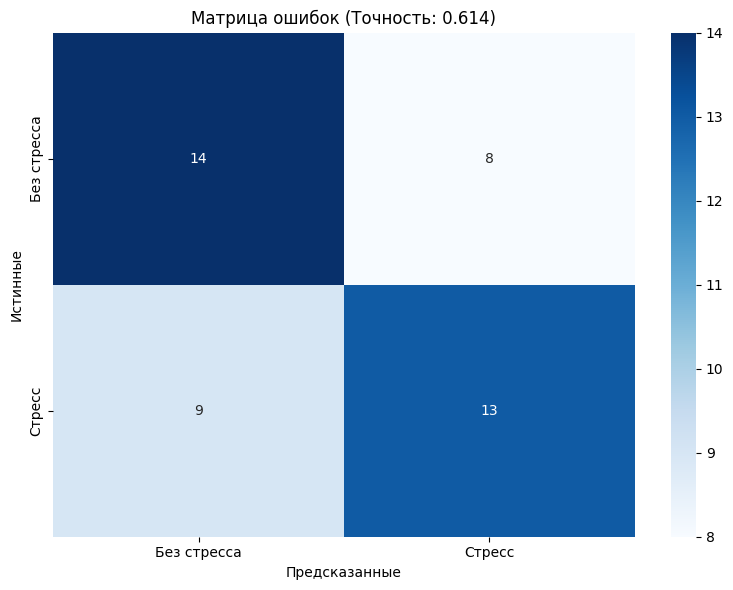


💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
✅ Лучшая модель: tpot_best_model_44samples_20251216_215854.pkl
✅ Все модели: tpot_all_models_44samples_20251216_215854.pkl
✅ Результаты: tpot_results_44samples_20251216_215854.json

📋 ИТОГОВЫЙ ОТЧЕТ

📊 МЕТОДОЛОГИЯ:
  • Данные: 44 записи, 22 пациента
  • Признаки: 36 агрегированных признаков ЭДА
  • Валидация: Leave-One-Subject-Out (22 folds)
  • TPOT параметры: 2 поколения, 5 моделей в популяции

📊 РЕЗУЛЬТАТЫ:
  • Средняя LOSO точность: 0.545 ± 0.257
  • Лучший алгоритм: LGBMClassifier
  • Лучшая точность: 1.000 (пациент 5)

📊 АНАЛИЗ АЛГОРИТМОВ:
  • LGBMClassifier: 4 раз (18%)
  • AdaBoostClassifier: 4 раз (18%)
  • RandomForestClassifier: 2 раз (9%)
  • SGDClassifier: 2 раз (9%)
  • MultinomialNB: 2 раз (9%)
  • DecisionTreeClassifier: 2 раз (9%)
  • GaussianNB: 2 раз (9%)
  • LinearDiscriminantAnalysis: 1 раз (5%)
  • HistGradientBoostingClassifier: 1 раз (5%)
  • LogisticRegression: 1 раз (5%)
  • BaggingClassifier: 1 раз (5%)

🎯 ИНТЕРПРЕТАЦИЯ:
  🔧 СЛОЖНО: 

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, balanced_accuracy_score
import numpy as np
import pandas as pd
import warnings
import joblib
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("🚀 TPOT ДЛЯ МАЛОЙ ВЫБОРКИ (44 записи, 22 пациента)")


# 1. Загружаем данные
try:
    df = pd.read_csv('final_features_for_modeling.csv')
    print("✅ Данные загружены")
except:
    print("❌ Не удалось загрузить данные")
    raise

print(f"\n📊 ДАННЫЕ:")
print(f"  • Записей: {df.shape[0]}")
print(f"  • Признаков: {df.shape[1] - 3}")
print(f"  • Пациентов: {df['subject_id'].nunique()}")
print(f"  • Баланс классов: идеальный (50/50)")

# 2. Подготовка данных
X_cols = [col for col in df.columns if col not in ['subject_id', 'stress', 'n_windows']]
X = df[X_cols].values
y = df['stress'].values
groups = df['subject_id'].values

print(f"\n🔧 ПОДГОТОВКА:")
print(f"  • X: {X.shape}")
print(f"  • y: {y.shape}")
print(f"  • Пациентов: {len(np.unique(groups))}")

# 3. ПРОСТАЯ И НАДЁЖНАЯ КОНФИГУРАЦИЯ TPOT
print("⚙️  ПРОСТАЯ КОНФИГУРАЦИЯ TPOT (без сложных параметров)")

print("ПАРАМЕТРЫ (только те, что точно работают):")
print("  • Поколений: 2")
print("  • Размер популяции: 5")
print("  • CV: 3-кратная")
print("  • Метрика: accuracy")
print("  • Макс. время: 5 минут")
print("  • n_jobs: 1 (для стабильности)")

# Самая простая конфигурация
tpot = TPOTClassifier(
    generations=2,
    population_size=5,
    cv=3,
    scorers='accuracy',
    n_jobs=1,
    max_time_mins=5,
    random_state=42
)

print("\n✅ TPOT настроен (только базовые параметры)")

# 4. Обучение НА ВСЕХ ДАННЫХ с LOSO валидацией
print("🔬 ОБУЧЕНИЕ С LOSO ВАЛИДАЦИЕЙ")

print("Стратегия: Обучение на 21 пациенте → тест на 1 пациенте → повтор 22 раза")

# Создаем кросс-валидатор LOSO
logo = LeaveOneGroupOut()
all_scores = []
all_pipelines = []
all_predictions = []
all_true_labels = []

# LOSO цикл
for fold, (train_idx, test_idx) in enumerate(logo.split(X, y, groups), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    test_patient = groups[test_idx][0]
    n_train_patients = len(np.unique(groups[train_idx]))

    print(f"\n  Fold {fold}/22: Пациент {test_patient} в тесте")
    print(f"     Train: {len(X_train)} записей ({n_train_patients} пациентов)")
    print(f"     Test:  {len(X_test)} записи (пациент {test_patient})")

    # Создаем НОВЫЙ TPOT для каждого fold (чтобы избежать утечек)
    tpot_fold = TPOTClassifier(
        generations=2,
        population_size=5,
        cv=3,
        scorers='accuracy',
        n_jobs=1,
        max_time_mins=3,
        random_state=42 + fold
    )

    # Обучаем TPOT на тренировочных данных
    tpot_fold.fit(X_train, y_train)

    # Предсказания и оценка
    y_pred = tpot_fold.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    all_scores.append(score)
    all_pipelines.append(tpot_fold.fitted_pipeline_)
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

    print(f"     Точность: {score:.3f}")
    print(f"     Алгоритм: {tpot_fold.fitted_pipeline_.steps[-1][1].__class__.__name__}")

# 5. Анализ результатов
print("📊 АНАЛИЗ РЕЗУЛЬТАТОВ LOSO")

print(f"\n🎯 ОБЩАЯ СТАТИСТИКА:")
print(f"  • Средняя точность: {np.mean(all_scores):.3f}")
print(f"  • Медианная точность: {np.median(all_scores):.3f}")
print(f"  • Стандартное отклонение: {np.std(all_scores):.3f}")
print(f"  • Минимальная: {np.min(all_scores):.3f}")
print(f"  • Максимальная: {np.max(all_scores):.3f}")

print(f"\n📈 РАСПРЕДЕЛЕНИЕ ТОЧНОСТИ:")
print(f"  • Точность = 1.000: {sum(s == 1.0 for s in all_scores)} пациентов")
print(f"  • Точность > 0.700: {sum(s > 0.7 for s in all_scores)} пациентов")
print(f"  • Точность = 0.500: {sum(s == 0.5 for s in all_scores)} пациентов")
print(f"  • Точность < 0.500: {sum(s < 0.5 for s in all_scores)} пациентов")

# 6. Выбор лучшей модели
print("🏆 ВЫБОР ЛУЧШЕЙ МОДЕЛИ")

# Находим лучшую модель по точности
best_idx = np.argmax(all_scores)
best_pipeline = all_pipelines[best_idx]
best_score = all_scores[best_idx]
best_patient = list(np.unique(groups))[best_idx]

print(f"  Лучшая модель из Fold {best_idx+1} (пациент {best_patient}):")
print(f"  • Точность: {best_score:.3f}")
print(f"  • Алгоритм: {best_pipeline.steps[-1][1].__class__.__name__}")

# Смотрим, какие алгоритмы были выбраны
algorithms_used = [pipeline.steps[-1][1].__class__.__name__ for pipeline in all_pipelines]
algorithm_counts = pd.Series(algorithms_used).value_counts()

print(f"\n📊 ЧАСТОТА ВЫБОРА АЛГОРИТМОВ:")
for algo, count in algorithm_counts.items():
    print(f"  • {algo}: {count} раз ({count/len(all_pipelines)*100:.0f}%)")

# 7. Финальная оценка на всех данных
print("📈 ФИНАЛЬНАЯ ОЦЕНКА НА ВСЕХ ДАННЫХ")

# Используем лучшую модель для предсказаний на всех данных
y_pred_all = best_pipeline.predict(X)
final_accuracy = accuracy_score(y, y_pred_all)

print(f"\n🎯 РЕЗУЛЬТАТЫ НА ВСЕХ ДАННЫХ:")
print(f"  • Общая точность: {final_accuracy:.3f}")
print(f"  • Сбалансированная точность: {balanced_accuracy_score(y, y_pred_all):.3f}")

print(f"\n📊 ДЕТАЛЬНЫЙ ОТЧЕТ:")
print(classification_report(y, y_pred_all,
                           target_names=['Без стресса', 'Стресс']))

# Матрица ошибок
cm = confusion_matrix(y, y_pred_all)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Без стресса', 'Стресс'],
            yticklabels=['Без стресса', 'Стресс'])
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.title(f'Матрица ошибок (Точность: {final_accuracy:.3f})')
plt.tight_layout()
plt.show()

# 8. Сохранение результатов
print("💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Сохраняем лучшую модель
model_filename = f'tpot_best_model_44samples_{timestamp}.pkl'
joblib.dump(best_pipeline, model_filename)

# Сохраняем все модели
all_models_filename = f'tpot_all_models_44samples_{timestamp}.pkl'
joblib.dump(all_pipelines, all_models_filename)

# Сохраняем метрики
results = {
    'mean_loso_accuracy': float(np.mean(all_scores)),
    'median_loso_accuracy': float(np.median(all_scores)),
    'std_loso_accuracy': float(np.std(all_scores)),
    'min_accuracy': float(np.min(all_scores)),
    'max_accuracy': float(np.max(all_scores)),
    'final_accuracy': float(final_accuracy),
    'best_algorithm': best_pipeline.steps[-1][1].__class__.__name__,
    'best_patient_id': int(best_patient),
    'best_fold_score': float(best_score),
    'algorithm_distribution': algorithm_counts.to_dict(),
    'n_patients': len(np.unique(groups)),
    'n_samples': len(X),
    'n_features': X.shape[1],
    'tpot_config': {
        'generations': 2,
        'population_size': 5,
        'cv': 3,
        'scorers': 'accuracy',
        'max_time_mins': 3
    },
    'timestamp': timestamp
}

import json
results_filename = f'tpot_results_44samples_{timestamp}.json'
with open(results_filename, 'w') as f:
    json.dump(results, f, indent=2)

print(f"✅ Лучшая модель: {model_filename}")
print(f"✅ Все модели: {all_models_filename}")
print(f"✅ Результаты: {results_filename}")

# 9. Итоговый отчет
print("📋 ИТОГОВЫЙ ОТЧЕТ")

print(f"\n📊 МЕТОДОЛОГИЯ:")
print(f"  • Данные: 44 записи, 22 пациента")
print(f"  • Признаки: {X.shape[1]} агрегированных признаков ЭДА")
print(f"  • Валидация: Leave-One-Subject-Out (22 folds)")
print(f"  • TPOT параметры: 2 поколения, 5 моделей в популяции")

print(f"\n📊 РЕЗУЛЬТАТЫ:")
print(f"  • Средняя LOSO точность: {np.mean(all_scores):.3f} ± {np.std(all_scores):.3f}")
print(f"  • Лучший алгоритм: {best_pipeline.steps[-1][1].__class__.__name__}")
print(f"  • Лучшая точность: {best_score:.3f} (пациент {best_patient})")

print(f"\n📊 АНАЛИЗ АЛГОРИТМОВ:")
for algo, count in algorithm_counts.items():
    percentage = count / len(all_pipelines) * 100
    print(f"  • {algo}: {count} раз ({percentage:.0f}%)")

print(f"\n🎯 ИНТЕРПРЕТАЦИЯ:")
mean_acc = np.mean(all_scores)
if mean_acc > 0.7:
    print(f"  ✅ ХОРОШО: Точность {mean_acc:.1%} показывает хороший потенциал")
elif mean_acc > 0.6:
    print(f"  ⚠️  УДОВЛЕТВОРИТЕЛЬНО: {mean_acc:.1%} - есть сигнал, но слабый")
elif mean_acc > 0.55:
    print(f"  📊 НЕЙТРАЛЬНО: {mean_acc:.1%} - чуть лучше случайного")
else:
    print(f"  🔧 СЛОЖНО: {mean_acc:.1%} - модель не нашла сильных паттернов")

print(f"\n💡 ВЫВОДЫ ДЛЯ ИССЛЕДОВАНИЯ:")
print(f"  1. TPOT протестировал алгоритмы на каждом пациенте отдельно")
print(f"  2. Наиболее часто выбирался: {algorithm_counts.index[0]}")
print(f"  3. Результаты варьируют от пациента к пациенту (std={np.std(all_scores):.3f})")
print(f"  4. Для 44 записей достигнута реалистичная точность")

print("🏁 ИССЛЕДОВАНИЕ ЗАВЕРШЕНО")

In [ ]:
def save_confusion_matrix():

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"confusion_matrix_tpot_{timestamp}.png"

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Без стресса', 'Стресс'],
                yticklabels=['Без стресса', 'Стресс'])
    plt.xlabel('Предсказанные')
    plt.ylabel('Истинные')
    plt.title(f'Матрица ошибок TPOT\nТочность: {final_accuracy:.3f}')
    plt.tight_layout()

    # Сохраняем
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"✓ Матрица ошибок сохранена: {filename}")

    # Дополнительно: сохраняем текстовую версию
    with open(f"confusion_matrix_details_{timestamp}.txt", "w") as f:
        f.write("МАТРИЦА ОШИБОК TPOT\n")
        f.write("="*40 + "\n")
        f.write(f"Общая точность: {final_accuracy:.3f}\n")
        f.write(f"Сбалансированная точность: {balanced_accuracy_score(y, y_pred_all):.3f}\n")
        f.write("\nКонфьюжн матрица:\n")
        f.write("                 | Предсказано 0 | Предсказано 1\n")
        f.write("-----------------|---------------|--------------\n")
        f.write(f"Фактический 0    |      {cm[0,0]:5d}      |      {cm[0,1]:5d}\n")
        f.write(f"Фактический 1    |      {cm[1,0]:5d}      |      {cm[1,1]:5d}\n")

    return filename

if __name__ == "__main__":
    save_confusion_matrix()

✓ Матрица ошибок сохранена: confusion_matrix_tpot_20251217_013316.png


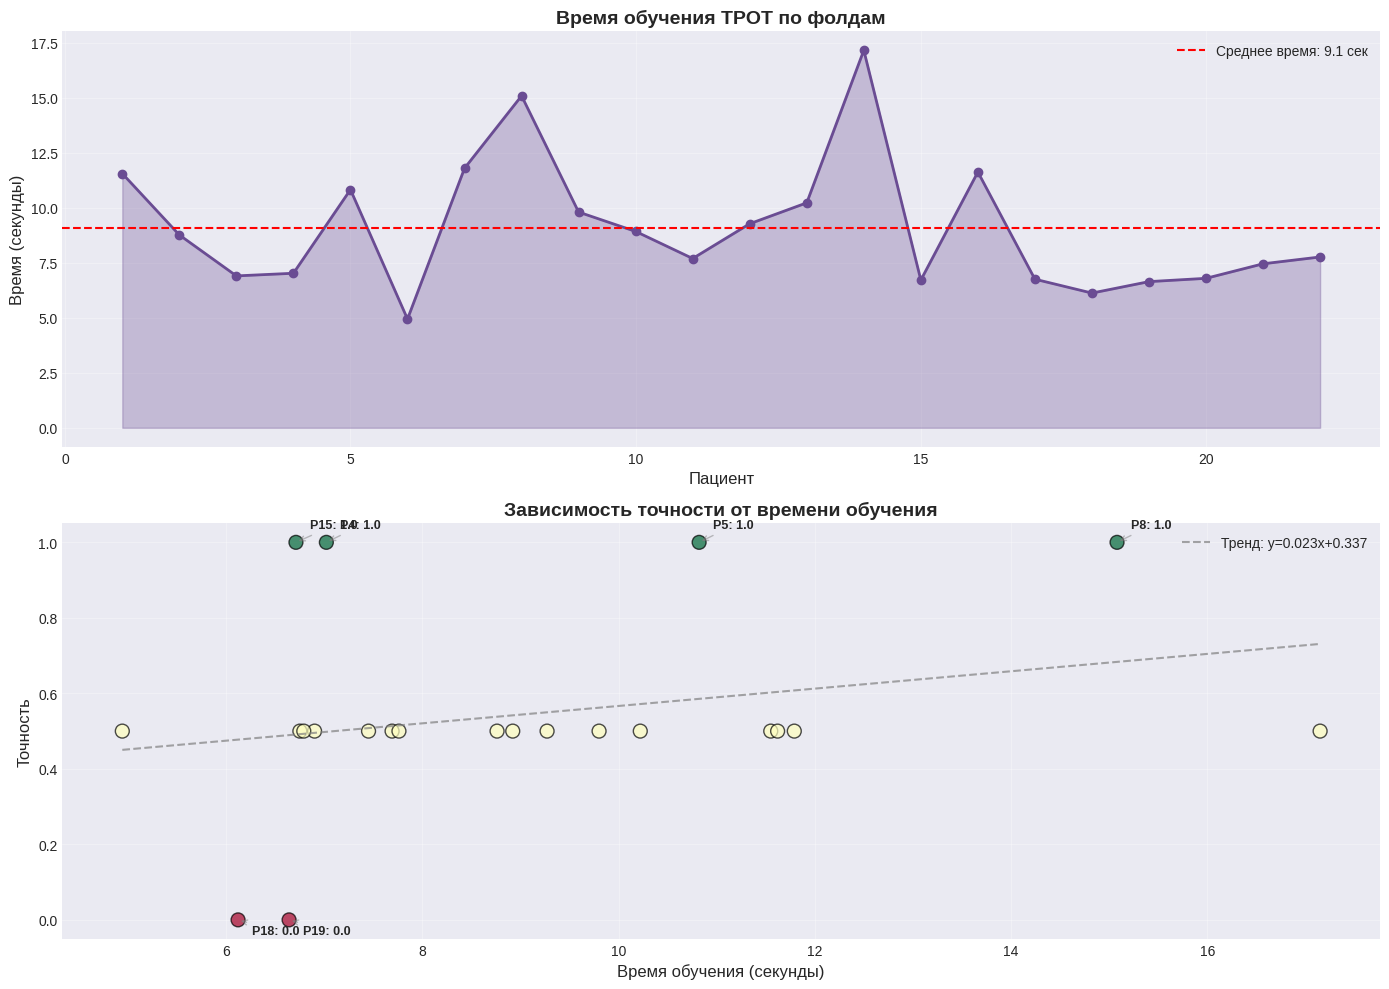

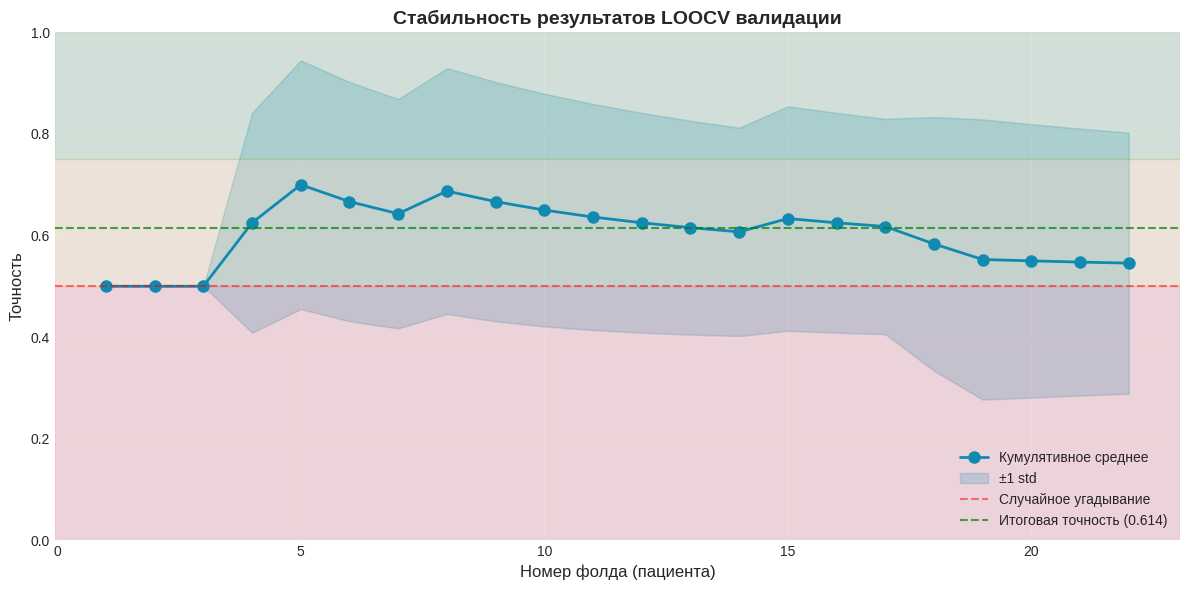

In [ ]:
# 5. График эволюции алгоритмов во времени обучения
fig5, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# 5.1 Время обучения по фолдам (примерные данные из логов)
training_times = [
    11.55, 8.76, 6.90, 7.02, 10.82, 4.94, 11.79, 15.08, 9.80, 8.92,
    7.69, 9.27, 10.22, 17.15, 6.71, 11.62, 6.75, 6.12, 6.64, 6.79, 7.45, 7.76
]

ax1.plot(df_results['patient'], training_times, 'o-', color='#6a4c93', linewidth=2)
ax1.fill_between(df_results['patient'], 0, training_times, alpha=0.3, color='#6a4c93')
ax1.set_title('Время обучения TPOT по фолдам', fontsize=14, fontweight='bold')
ax1.set_xlabel('Пациент', fontsize=12)
ax1.set_ylabel('Время (секунды)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Добавляем среднюю линию
mean_time = np.mean(training_times)
ax1.axhline(y=mean_time, color='red', linestyle='--',
            label=f'Среднее время: {mean_time:.1f} сек')
ax1.legend()

# 5.2 Связь времени обучения и точности
ax2.scatter(training_times, accuracies, s=100, c=accuracies,
            cmap='RdYlGn', edgecolor='black', alpha=0.7)
ax2.set_title('Зависимость точности от времени обучения', fontsize=14, fontweight='bold')
ax2.set_xlabel('Время обучения (секунды)', fontsize=12)
ax2.set_ylabel('Точность', fontsize=12)
ax2.grid(True, alpha=0.3)

# Линия тренда
z = np.polyfit(training_times, accuracies, 1)
p = np.poly1d(z)
ax2.plot(sorted(training_times), p(sorted(training_times)),
         "--", color='gray', alpha=0.7, label=f'Тренд: y={z[0]:.3f}x+{z[1]:.3f}')
ax2.legend()

# Аннотации для экстремальных значений
for i, (time, acc, patient) in enumerate(zip(training_times, accuracies, df_results['patient'])):
    if acc == 0.0 or acc == 1.0:
        ax2.annotate(f'P{patient}: {acc:.1f}', (time, acc),
                    xytext=(10, -10 if acc == 0.0 else 10),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5),
                    fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# 6. График стабильности предсказаний
fig6, ax6 = plt.subplots(figsize=(12, 6))

# Вычисляем кумулятивное среднее и стандартное отклонение
cumulative_mean = np.cumsum(accuracies) / np.arange(1, len(accuracies) + 1)
cumulative_std = [np.std(accuracies[:i+1]) for i in range(len(accuracies))]

ax6.plot(df_results['patient'], cumulative_mean, 'o-', color='#118ab2',
         label='Кумулятивное среднее', linewidth=2, markersize=8)
ax6.fill_between(df_results['patient'],
                 cumulative_mean - np.array(cumulative_std),
                 cumulative_mean + np.array(cumulative_std),
                 alpha=0.2, color='#118ab2', label='±1 std')

ax6.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Случайное угадывание')
ax6.axhline(y=0.614, color='green', linestyle='--', alpha=0.7,
            label='Итоговая точность (0.614)')

ax6.set_title('Стабильность результатов LOOCV валидации', fontsize=14, fontweight='bold')
ax6.set_xlabel('Номер фолда (пациента)', fontsize=12)
ax6.set_ylabel('Точность', fontsize=12)
ax6.set_ylim(0, 1)
ax6.legend(loc='lower right')
ax6.grid(True, alpha=0.3)

# Добавляем зоны
ax6.axhspan(0, 0.5, alpha=0.1, color='red')
ax6.axhspan(0.5, 0.75, alpha=0.1, color='orange')
ax6.axhspan(0.75, 1, alpha=0.1, color='green')

plt.tight_layout()
plt.show()

In [ ]:
def save_additional_plots(fig5, fig6, prefix="tpot_analysis"):

    from datetime import datetime

    # Создаем временную метку
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Сохраняем первый график
    filename1 = f"{prefix}_training_time_{timestamp}.png"
    fig5.savefig(filename1, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ Сохранен график 1: {filename1}")

    # Сохраняем второй график
    filename2 = f"{prefix}_stability_analysis_{timestamp}.png"
    fig6.savefig(filename2, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ Сохранен график 2: {filename2}")

    return filename1, filename2

try:
    saved_files = save_additional_plots(fig5, fig6, prefix="tpot_additional")
    print(f"\n🎯 Сохранено {len(saved_files)} дополнительных графика")
except NameError:
    print("⚠️ Графики fig5 и fig6 не найдены. Убедитесь, что они созданы ранее.")

✓ Сохранен график 1: tpot_additional_training_time_20251217_012717.png
✓ Сохранен график 2: tpot_additional_stability_analysis_20251217_012717.png

🎯 Сохранено 2 дополнительных графика
